In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('diabetes_resampled.csv')

In [4]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df.head(5)

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Glucose BloodPressure,Glucose BMI,Glucose DiabetesPedigreeFunction,BloodPressure BMI,BMI DiabetesPedigreeFunction,Outcome,pregnancies_categories_0 - 3,pregnancies_categories_4- 8,pregnancies_categories_9 - 12,pregnancies_categories_13 - 17,age_categories_20 - 24,age_categories_25 - 29,age_categories_30-39,age_categories_40 - 49,age_categories_50 - 59,age_categories_60 - 69,age_categories_70 - 81
0,0.264516,0.428571,0.171779,0.116567,0.113364,0.045438,0.030834,0.073620,0.020024,0,1,0,0,0,0,0,1,0,0,0,0
1,0.290323,0.428571,0.202454,0.038002,0.124424,0.058777,0.011033,0.086766,0.007694,0,1,0,0,0,1,0,0,0,0,0,0
2,0.464516,0.510204,0.151329,0.052519,0.236998,0.070295,0.024396,0.077209,0.007948,0,0,1,0,0,0,1,0,0,0,0,0
3,0.458065,0.493980,0.349693,0.023911,0.226275,0.160182,0.010953,0.172741,0.008362,0,0,0,1,0,0,1,0,0,0,0,0
4,0.425806,0.693878,0.396728,0.048249,0.295458,0.168929,0.020545,0.275281,0.019142,0,1,0,0,0,0,1,0,0,0,0,0


In [6]:
df.columns

Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction',
       'Glucose BloodPressure', 'Glucose BMI',
       'Glucose DiabetesPedigreeFunction', 'BloodPressure BMI',
       'BMI DiabetesPedigreeFunction', 'Outcome',
       'pregnancies_categories_0 - 3', 'pregnancies_categories_4- 8',
       'pregnancies_categories_9 - 12', 'pregnancies_categories_13 - 17',
       'age_categories_20 - 24', 'age_categories_25 - 29',
       'age_categories_30-39', 'age_categories_40 - 49',
       'age_categories_50 - 59', 'age_categories_60 - 69',
       'age_categories_70 - 81'],
      dtype='object')

In [7]:
#Dropping one dummy column from pregnancies and age to avoid multicollinearity
df.drop(columns = ['age_categories_70 - 81', 'pregnancies_categories_13 - 17'], axis = 1, inplace = True)

##### Creating x, Y and test-train-splits

In [8]:
X = df.drop(columns = ['Outcome'], axis = 1)

In [9]:
y = df.Outcome

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

### Model Testing

##### Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
#from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [12]:
#First testing logistic regression using Grid Search.
logistic = linear_model.LogisticRegression()

In [13]:
#Creating regularization penalty space 
penalty = ['l1', 'l2']
C = C_param_range = [0.4, 0.45, 0.5, 0.55, 0.6] #These have been changed after running model before.
hyperparameters = dict(C =C, penalty = penalty)

In [14]:
clf_gs = GridSearchCV(logistic, hyperparameters, cv = 5, scoring = 'f1')

In [15]:
model = clf_gs.fit(X_train, y_train)

C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [16]:
#View best parameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.4


In [17]:
from sklearn import metrics
y_pred_train = model.best_estimator_.predict(X_train)
y_pred_test = model.best_estimator_.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.774281805745554
Testing F1 Score: 0.7565543071161048


In [18]:
feature_cols = X_train.columns

In [19]:
model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))
model_params.sort(key = lambda x: abs(x[1]), reverse=True)
model_params 
#Models in order of weight

[('Glucose', 2.5911395800813635),
 ('Glucose BMI', 1.5595126181259895),
 ('Glucose BloodPressure', 1.408203538364371),
 ('BMI', 1.2020297173778798),
 ('age_categories_60 - 69', -0.8435869253778194),
 ('age_categories_20 - 24', -0.8290483619584004),
 ('age_categories_40 - 49', 0.7977573317914479),
 ('pregnancies_categories_0 - 3', -0.7647384300515405),
 ('BloodPressure BMI', 0.7270176987113499),
 ('age_categories_25 - 29', -0.6161074045660636),
 ('pregnancies_categories_9 - 12', -0.593598558548211),
 ('Glucose DiabetesPedigreeFunction', 0.5546057309783639),
 ('DiabetesPedigreeFunction', 0.4554948105038361),
 ('pregnancies_categories_4- 8', -0.38410308538393456),
 ('BMI DiabetesPedigreeFunction', 0.3529746424172745),
 ('BloodPressure', -0.3353023619793114),
 ('age_categories_30-39', 0.16597989721880296),
 ('age_categories_50 - 59', 0.09583362655728786)]

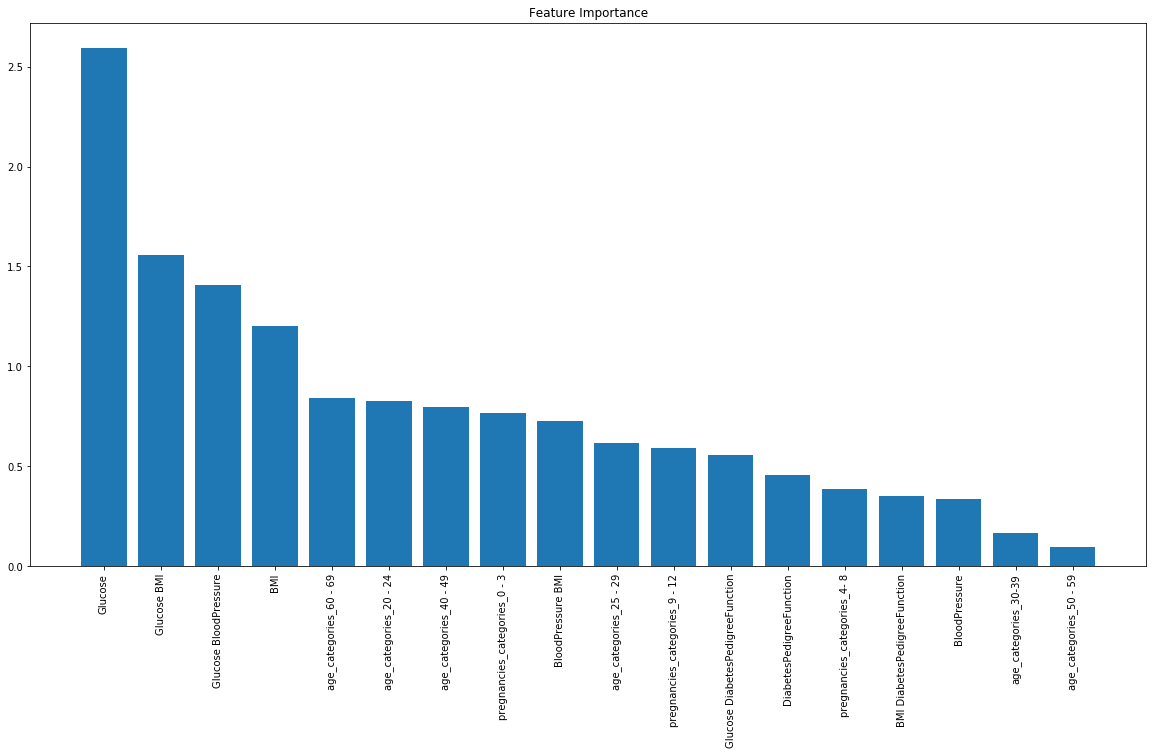

In [23]:
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in model_params]

feature_weights = [abs(i[1]) for i in model_params]

# Create plot
plt.figure(figsize = (20, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), model_features, rotation=90)

# Show plot
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [25]:
confusion_matrix(y_test,y_pred_test)

array([[ 84,  31],
       [ 34, 101]], dtype=int64)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

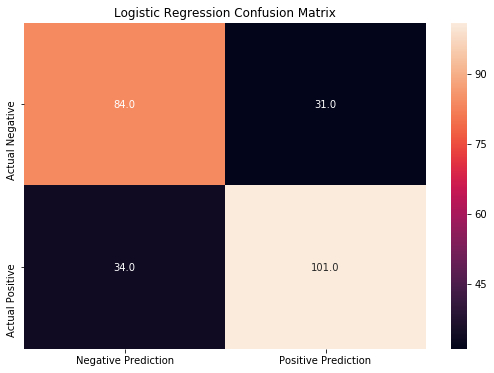

In [26]:
plt.figure(figsize = (9, 6))
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot = True , fmt = ".1f", xticklabels=['Negative Prediction','Positive Prediction'], yticklabels=['Actual Negative','Actual Positive'])
plt.title('Logistic Regression Confusion Matrix')
#Top left is true negatives, top right is false positives, bottom left is false negatives, bottom right is true positives

##### Decision Tree Model with GridSearch

In [89]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4,5, 6],
    'min_samples_leaf': [0.06, 0.07, 0.08],
    }

In [90]:
clf_dt = DecisionTreeClassifier()

In [91]:
CV_dt = GridSearchCV(estimator= clf_dt, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6], 'min_samples_leaf': [0.06, 0.07, 0.08]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [92]:
CV_dt.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 0.07}

In [94]:
cv_dt_pred = CV_dt.best_estimator_.predict(X_test)
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, cv_dt_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, cv_dt_pred))

Test Accuracy score:  0.732
Test F1 score:  0.7351778656126483


In [95]:
cv_dt_predtrain = CV_dt.best_estimator_.predict(X_train)

In [96]:
print('Training Accuracy Score: ', f1_score(y_train, cv_dt_predtrain))

Training Accuracy Score:  0.7782546494992848


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

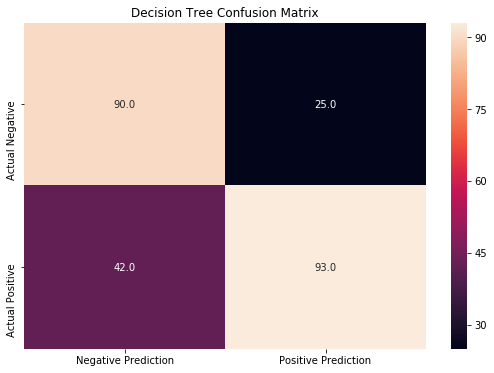

In [35]:
plt.figure(figsize = (9, 6))
sns.heatmap(confusion_matrix(y_test, cv_dt_pred), annot = True, fmt = ".1f", xticklabels=['Negative Prediction','Positive Prediction'], yticklabels=['Actual Negative','Actual Positive'])
plt.title('Decision Tree Confusion Matrix')

##### Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier()

In [43]:
parameters = { 
    'n_estimators': [100, 200, 300],
    'max_features': [0.25, 0.33, 0.5 ],
    'max_depth' : [4, 5, 6],
    'min_samples_leaf': [0.03,0.04,0.05,0.06]
}

In [44]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300], 'max_features': [0.25, 0.33, 0.5], 'max_depth': [4, 5, 6], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
CV_rfc.best_params_

{'max_depth': 6,
 'max_features': 0.33,
 'min_samples_leaf': 0.03,
 'n_estimators': 200}

In [46]:
rfc_pred = CV_rfc.best_estimator_.predict(X_test)
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.792
Test F1 score:  0.8181818181818181


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

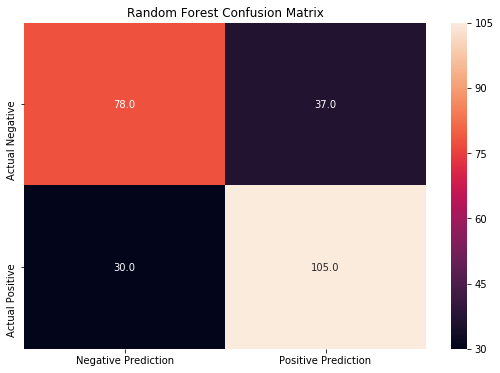

In [98]:
plt.figure(figsize = (9, 6))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True, fmt = ".1f", xticklabels=['Negative Prediction','Positive Prediction'], yticklabels=['Actual Negative','Actual Positive'])
plt.title('Random Forest Confusion Matrix')


##### KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 9, p = 2)
clf_knn.fit(X_train, y_train)
test_preds = clf_knn.predict(X_test)

In [154]:
print("Accuracy Score: {}".format(accuracy_score(y_test, test_preds)))
print("F1 Score: {}".format(f1_score(y_test, test_preds)))

Accuracy Score: 0.764
F1 Score: 0.7900355871886121


Text(0.5, 1.0, 'KNN Confusion Matrix')

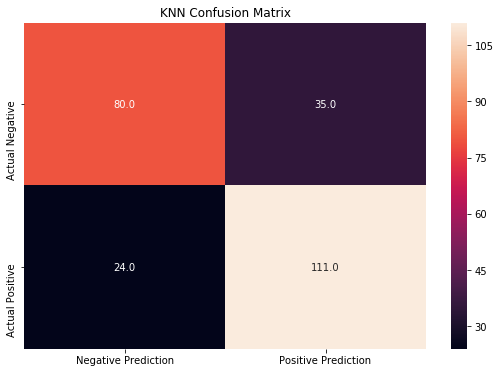

In [127]:
plt.figure(figsize = (9, 6))
sns.heatmap(confusion_matrix(y_test, test_preds), annot = True, fmt = ".1f", xticklabels=['Negative Prediction','Positive Prediction'], yticklabels=['Actual Negative','Actual Positive'])
plt.title('KNN Confusion Matrix')


##### XGBoost 

In [81]:
import xgboost as xgb

In [146]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100)

In [147]:
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [148]:
preds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.796000
F1: 0.818505


Text(0.5, 1.0, 'XGBoost Confusion Matrix')

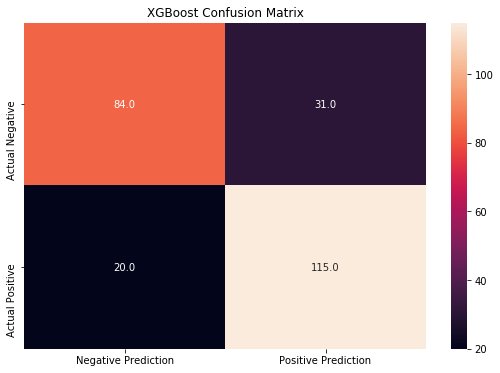

In [154]:
plt.figure(figsize = (9, 6))
sns.heatmap(confusion_matrix(y_test, preds), annot = True, fmt = ".1f" , xticklabels=['Negative Prediction','Positive Prediction'], yticklabels=['Actual Negative','Actual Positive'] )
plt.title('XGBoost Confusion Matrix')

In [104]:
data_dmatrix = xgb.DMatrix(data=X,label=y)


C:\Users\ar344\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ar344\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [105]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results 

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.675788,0.000781,0.677532,0.001434
1,0.661455,0.004886,0.664858,0.005218
2,0.648686,0.005480,0.652194,0.008377
3,0.640106,0.006084,0.644201,0.008036
4,0.627658,0.004471,0.633368,0.005260
5,0.616082,0.008562,0.622969,0.006687
6,0.604937,0.012317,0.613916,0.009144
7,0.593941,0.010665,0.604274,0.005719
8,0.584760,0.011496,0.597124,0.003780
9,0.577052,0.013530,0.591426,0.004275


In [124]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

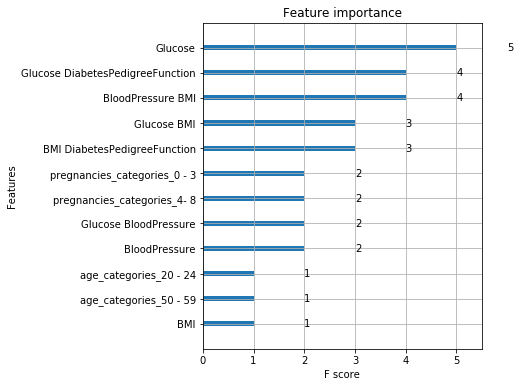

In [163]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [124]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))


    return alg
#     feat_imp = pd.Series(alg.get_booster().get_fscore())
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [118]:
train  = pd.concat([X_train, y_train], axis=1)
target = 'Outcome'


In [119]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [120]:
from sklearn.metrics import roc_auc_score

In [125]:
predictors = [x for x in train.columns if x not in [target]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators= 100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=3,
 scale_pos_weight=1,
 seed=27)

alg = modelfit(xgb1, train, predictors, target)


Model Report
Accuracy : 0.9893
AUC Score (Train): 0.999466


In [136]:
alg.feature_importances_ #Looking at feature importances

array([0.05521603, 0.03384791, 0.03694503, 0.03684217, 0.06049101,
       0.11456902, 0.04112436, 0.03755602, 0.04513597, 0.04884591,
       0.04409697, 0.06541821, 0.07627413, 0.07426856, 0.0365489 ,
       0.09780221, 0.02330214, 0.07171538], dtype=float32)

### Using Less Features 

In [48]:
#Seeing how model is affected by dropping the most important feature 
#Most important feature was Glucose according to previous models
X1 = df.drop(columns = ['Outcome', 'Glucose'], axis = 1)

In [49]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 5)

In [51]:
#Creating regularization penalty space 
penalty = ['l1', 'l2']
C = C_param_range = [0.4, 0.45, 0.5, 0.55, 0.6] 
hyperparameters = dict(C =C, penalty = penalty)

In [52]:
clf_gs1 = GridSearchCV(logistic, hyperparameters, cv = 5, scoring = 'f1')

In [53]:
model = clf_gs1.fit(X1_train, y_train)

C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [54]:
#View best parameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.45


In [56]:
y_pred_train = model.best_estimator_.predict(X1_train)
y_pred_test = model.best_estimator_.predict(X1_test)
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.7761194029850746
Testing F1 Score: 0.7490636704119851


In [58]:
model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))
model_params.sort(key = lambda x: abs(x[1]), reverse=True)
model_params 

[('DiabetesPedigreeFunction', 2.993756049905832),
 ('Glucose BloodPressure', 2.487657609052886),
 ('BloodPressure', 1.1969760855358602),
 ('Glucose BMI', 1.0105006187833474),
 ('age_categories_30-39', 0.815874153182005),
 ('pregnancies_categories_9 - 12', -0.7738743878841006),
 ('age_categories_50 - 59', -0.7261896395822077),
 ('Glucose DiabetesPedigreeFunction', 0.5918155554695297),
 ('age_categories_20 - 24', -0.5587147732138936),
 ('BMI DiabetesPedigreeFunction', -0.555912930148672),
 ('pregnancies_categories_4- 8', -0.5217513097696382),
 ('BMI', 0.4130232300879217),
 ('Glucose', -0.4051392798948658),
 ('BloodPressure BMI', 0.3157177458728028),
 ('age_categories_40 - 49', 0.2874730781900079),
 ('age_categories_25 - 29', 0.272517272703452),
 ('pregnancies_categories_0 - 3', -0.23471261644898458)]

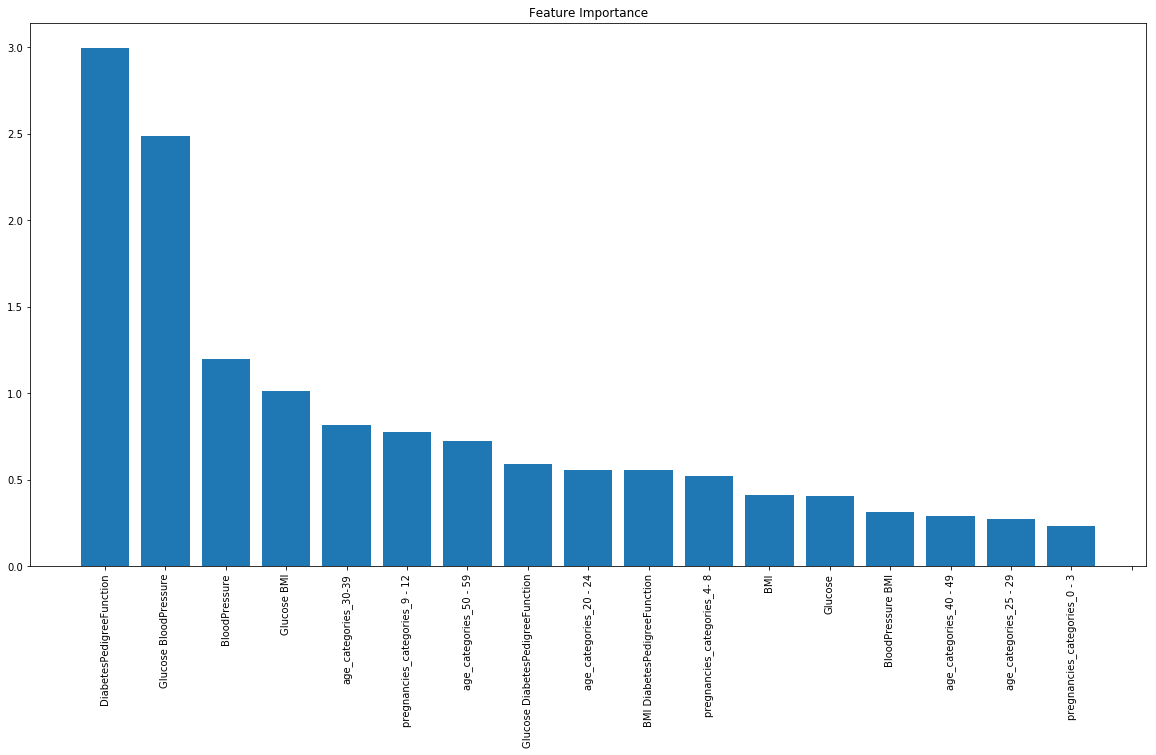

In [59]:
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in model_params]

feature_weights = [abs(i[1]) for i in model_params]

# Create plot
plt.figure(figsize = (20, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), model_features, rotation=90)

# Show plot
plt.show()

In [67]:

X2 = df[['Glucose', 'DiabetesPedigreeFunction']]

In [128]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.25, random_state = 5)

In [129]:
clf_gs2 = GridSearchCV(logistic, hyperparameters, cv = 5, scoring = 'f1')

In [130]:
model = clf_gs1.fit(X2_train, y_train)

C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ar344\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [137]:
#View best parameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.4


In [138]:
y_pred_train = model.best_estimator_.predict(X2_train)
y_pred_test = model.best_estimator_.predict(X2_test)
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.6812227074235808
Testing F1 Score: 0.6825396825396826


In [139]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 5,n_jobs=-1)

In [140]:
CV_rfc.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [76]:
CV_rfc

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300], 'max_features': [0.25, 0.33, 0.5], 'max_depth': [4, 5, 6], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [141]:
CV_rfc.fit(X2_train, y_train)
rfc_pred = CV_rfc.best_estimator_.predict(X2_test)
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.736
Test F1 score:  0.7625899280575539


Text(0.5, 1.0, 'Random Forest(Less Features) Confusion Matrix')

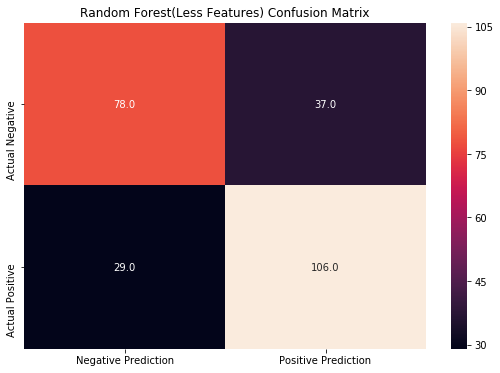

In [144]:
plt.figure(figsize = (9, 6))
sns.heatmap(confusion_matrix(y_test, rfc_pred), fmt = ".1f", xticklabels=['Negative Prediction','Positive Prediction'], yticklabels=['Actual Negative','Actual Positive'], annot = True)
plt.title('Random Forest(Less Features) Confusion Matrix')